# Glycolysis analysis

##Import python libraries

In [1]:
%pylab inline

import sys
sys.path.append('/trombone1/home/scalhoun/bin/repo')
from analyze_test import pathens
from analyze_test import pathstring_to_table
import numpy as np
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


##Define file locations, input enzymes/ligands, and true pathway

In [2]:
datafile = './data/gly_data.h5'
picklefile = './output/gly.pickle'
enzs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
ligands = ['C00031', 'C00092', 'C00085', 'C00354', 'C00111', 'C00118', 'C00236', 'C00197', 'C00631', 'C00074', 'C00022']

##Load the pathway models from the output pickle file and data

In [3]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_path(enzymelist=enzs, ligandlist=ligands)
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices()
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)
print 'Number of clusters: %d' % np.max(pE.flatclusters)

Number of unique paths: 2169
Number of clusters: 4


##Find the rank of the pathwya model that matches the true pathway

In [4]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of true path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
print pE.true_path

Rank of true path: 1
C00031 -> 1 -> C00092 -> 2 -> C00085 -> 3 -> C00354 -> 4 -> C00111 -> 5 -> C00118 -> 6 -> C00236 -> 7 -> C00197 -> 8 -> C00631 -> 9 -> C00074 -> 10 -> C00022


##Entropy by position

In [5]:
pE.evaluate_accuracy_precision()

Mean Entropy: 0.771
Mean Interaction Weight: 0.820
Mean Ranks over Position: 1.000
  Components appearing at position: 21.0


##Rank of substrate and product to their corresponding enzyme

In [6]:
HTML(pE.ligand_rankings_html())

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
1,37,1354,1,1,3
2,108,77,1,1,2
3,18,30,1,1,1
4,183,158,1,1,2
5,12,130,1,1,1
6,865,2918,1,1,2
7,71,74,1,1,2
8,5,2,1,1,1
9,27,76,1,1,1
10,129,898,1,1,1


##Frequency of enzyme occurring in pathway model ensemble at every position

In [7]:
pE.calculate_frequency_by_position()

position
1           90.917473
2           91.055786
3           89.903181
4           90.179806
5           89.396035
6           89.396035
7           89.211618
8           89.211618
9           89.396035
10          89.396035
dtype: float64

##Accuracy by position

In [14]:
HTML(pE.get_html_table(percent_cutoff=.005, enz_percent_cutoff=.4))

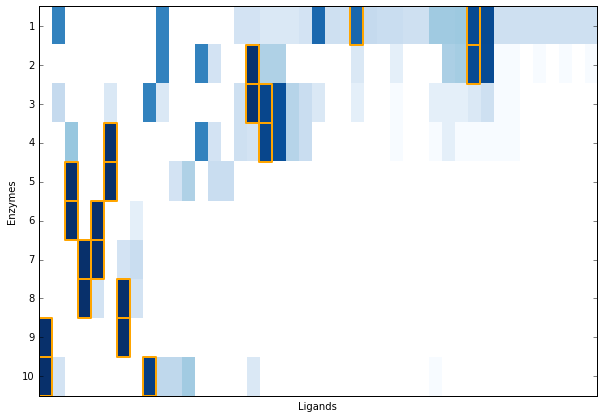

In [11]:
pE.plot_heatmap_ligands(percent_cutoff=.2, aspect_ratio=3, figsize=(10,8))

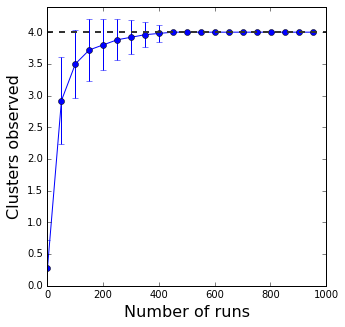

In [13]:
pE.plot_convergence_by_runs(run_increment=50)